### Exercise 10: 
*Synthesize data consisting of 04 different classes in 2D, as 4 overlapping 2D Gaussians, then apply Multinomial Logistic Regression, visualize the results, showing correct & incorrect points differently.*

In [1]:
import numpy as np
import matplotlib.pyplot as plt

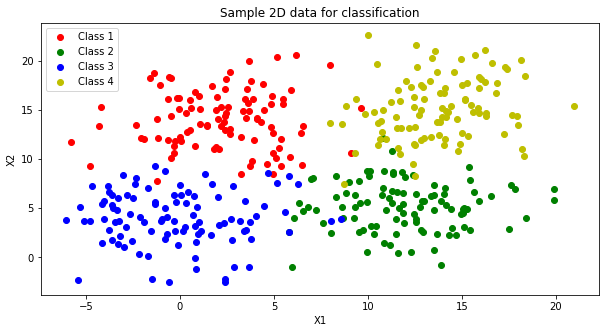

In [2]:
# Generate synthetic X/y data
mul1 = np.array([2,14])
mul2 = np.array([12,5])
mul3 = np.array([0,4])
mul4 = np.array([14,15])
sigma = np.array([[8,0],[0,8]])

X1 = np.random.multivariate_normal(mul1, sigma, 100)
X2 = np.random.multivariate_normal(mul2, sigma, 100)
X3 = np.random.multivariate_normal(mul3, sigma, 100)
X4 = np.random.multivariate_normal(mul4, sigma, 100)

plt.figure(figsize=(10, 5))
plt.plot(X1[:,0],X1[:,1],'ro', label='Class 1')
plt.plot(X2[:,0],X2[:,1],'go', label='Class 2')
plt.plot(X3[:,0],X3[:,1],'bo', label='Class 3')
plt.plot(X4[:,0],X4[:,1],'yo', label='Class 4')
plt.title('Sample 2D data for classification')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

In [3]:
X = np.concatenate((np.ones((400, 1)), np.concatenate((X1, X2, X3, X4))), 1)
y = np.concatenate((np.ones((100, 1)),np.full((100,1),2,np.float32),np.full((100,1),3,np.float32),np.full((100,1),4,np.float32)), 0)
K = 5

In [4]:
theta = np.zeros((K, X.shape[1]))

def hypothesis(X, theta):
    K = theta.shape[0]
    m = X.shape[0]
    a = np.zeros((m, K))
    for k in range(K):
        a[:,k:k+1] = X @ theta[k:k+1,:].T
    e_a = np.exp(a)
    return e_a / e_a.sum(axis=1, keepdims=True)

def onehot(y, K):
    Y = np.zeros((y.shape[0], K))
    for k in range(K):
        Y[y.reshape(-1)==k,k] = 1
    return Y
    
def cost(X, y, theta):
    K = theta.shape[0]
    m = X.shape[0]
    yhat = hypothesis(X, theta)
    # Form the matrix delta(y=k)
    Y = onehot(y, K)
    J = 0
    for k in range(K):
        J = J - np.log(yhat[y.reshape(-1)==k,k]).sum()
    J = J / m
    # Get the gradient matrix for theta
    grad_J = (yhat - Y).T @ X
    return J, grad_J

alpha = 0.000005
for epoch in range(10000):
    J, grad_J = cost(X, y, theta)
    if epoch % 1000 == 0:
        print('Epoch %d: cost %f' % (epoch, J))
    theta = theta - alpha * grad_J

Epoch 0: cost 1.609438
Epoch 1000: cost 0.611459
Epoch 2000: cost 0.556921
Epoch 3000: cost 0.521293
Epoch 4000: cost 0.492398
Epoch 5000: cost 0.467644
Epoch 6000: cost 0.446038
Epoch 7000: cost 0.427017
Epoch 8000: cost 0.410181
Epoch 9000: cost 0.395211


In [5]:
theta.shape

(5, 3)

In [6]:
m = X.shape[0]
preds = hypothesis(X, theta)
pred_classes = np.argmax(preds, axis=1)
print('Training set accuracy: %f' % ((pred_classes==y.reshape(-1)).sum()/m))

Training set accuracy: 0.895000


In [7]:
preds.shape

(400, 5)

In [8]:
pred_classes.shape

(400,)

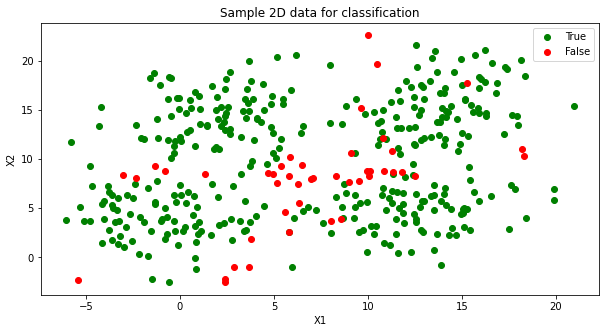

In [9]:
true = []
false = []
n = pred_classes.shape[0]
for i in range(0,101):
    if pred_classes[i] == 1:
        true.append(X[i:i+1,:])
    else: false.append(X[i:i+1,:])
for i in range(101,201):
    if pred_classes[i] == 2:
        true.append(X[i:i+1,:])
    else: false.append(X[i:i+1,:])
for i in range(201,301):
    if pred_classes[i] == 3:
        true.append(X[i:i+1,:])
    else: false.append(X[i:i+1,:])
for i in range(301,400):
    if pred_classes[i] == 4:
        true.append(X[i:i+1,:])
    else: false.append(X[i:i+1,:])
    
X_true = np.concatenate(true, axis=0)
X_false = np.concatenate(false, axis=0)

plt.figure(figsize=(10, 5))
plt.plot(X_true [:,1],X_true [:,2],'go', label='True')
plt.plot(X_false[:,1],X_false[:,2],'ro', label='False')

plt.title('Sample 2D data for classification')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

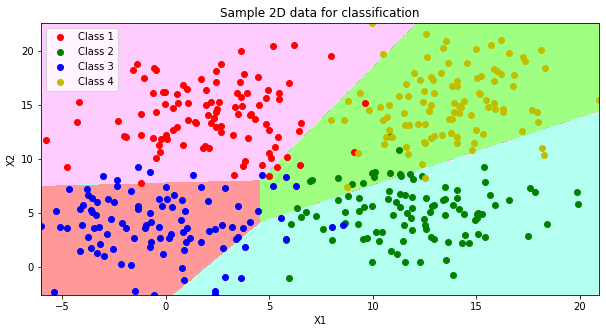

In [10]:
# Visual
from matplotlib.colors import ListedColormap
plt.figure(figsize=(10,5))

colors = ListedColormap(['#ffccff','#b3fff0','#ff9999','#9fff80'])

x1 = np.linspace(X[:,1].min(),X[:,1].max(),500).reshape(-1,1)
x2 = np.linspace(X[:,2].min(),X[:,2].max(),500).reshape(-1,1)

x,y = np.meshgrid(x1,x2)

X_plot = np.c_[np.ones((x.shape[0]**2,1)).ravel(),x.ravel(),y.ravel()]

preds = hypothesis(X_plot, theta)
pred_plot = np.argmax(preds, axis=1)
z = pred_plot.reshape(x.shape)

plt.contourf(x,y,z,cmap = colors)

plt.plot(X1[:,0],X1[:,1],'ro', label='Class 1')
plt.plot(X2[:,0],X2[:,1],'go', label='Class 2')
plt.plot(X3[:,0],X3[:,1],'bo', label='Class 3')
plt.plot(X4[:,0],X4[:,1],'yo', label='Class 4')
plt.title('Sample 2D data for classification')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()
